
##Detección de Somnolencia en Conductores a partir de tecnicas de aprendizaje automatico. **texto en negrita**

Este notebook presenta el proceso completo para la detección de somnolencia en conductores de vehículos mediante el uso de técnicas de aprendizaje automático. El flujo de trabajo incluye la conversión de datos, preprocesamiento, análisis exploratorio de datos y evaluación de modelos.

## 1. Carga de Librerías y Datos

En esta sección, se cargan las librerías necesarias para el análisis y se importa el conjunto de datos utilizado en el proyecto.

In [3]:
#Se procede a instalar librerias como matplotlib y numpy
!pip install matplotlib
!pip install numpy
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 6.2 MB/s eta 0:00:00


In [77]:
#Se realiza importancion de las librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
from unidecode import unidecode  # Importar la función unidecode desde la librería unidecode
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from google.colab import drive
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor


In [96]:
# Lectura del dataset
drive.mount('/gdrive')
ruta = "/gdrive/MyDrive/datasetu.csv"
data = pd.read_csv(ruta, encoding='latin-1')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [97]:
print(data.shape)
data.head()

(310, 15)


,Participante,Nombre,Edad,Fecha,Hora,Género,Anteojos,Barba,Bigote,Jornada,Clima,Luminosidad LUX,ID-Video,FC SISTOLE,FC DIASTOLE
0,1,Michael Arley Chaparro,27,01/12/2024,09:47:00 AM,Masculino,NO,SI,NO,MAÑANA,DESPEJADO,942,1,122,78
1,1,Michael Arley Chaparro,27,01/12/2024,09:49:00 AM,Masculino,NO,SI,NO,MAÑANA,DESPEJADO,429,1,122,78
2,1,Michael Arley Chaparro,27,01/12/2024,09:51:00 AM,Masculino,NO,SI,NO,MAÑANA,DESPEJADO,439,1,118,76
3,1,Michael Arley Chaparro,27,01/12/2024,09:53:00 AM,Masculino,NO,SI,NO,MAÑANA,DESPEJADO,740,1,118,76
4,1,Michael Arley Chaparro,27,01/12/2024,09:55:00 AM,Masculino,NO,SI,NO,MAÑANA,DESPEJADO,990,1,121,78


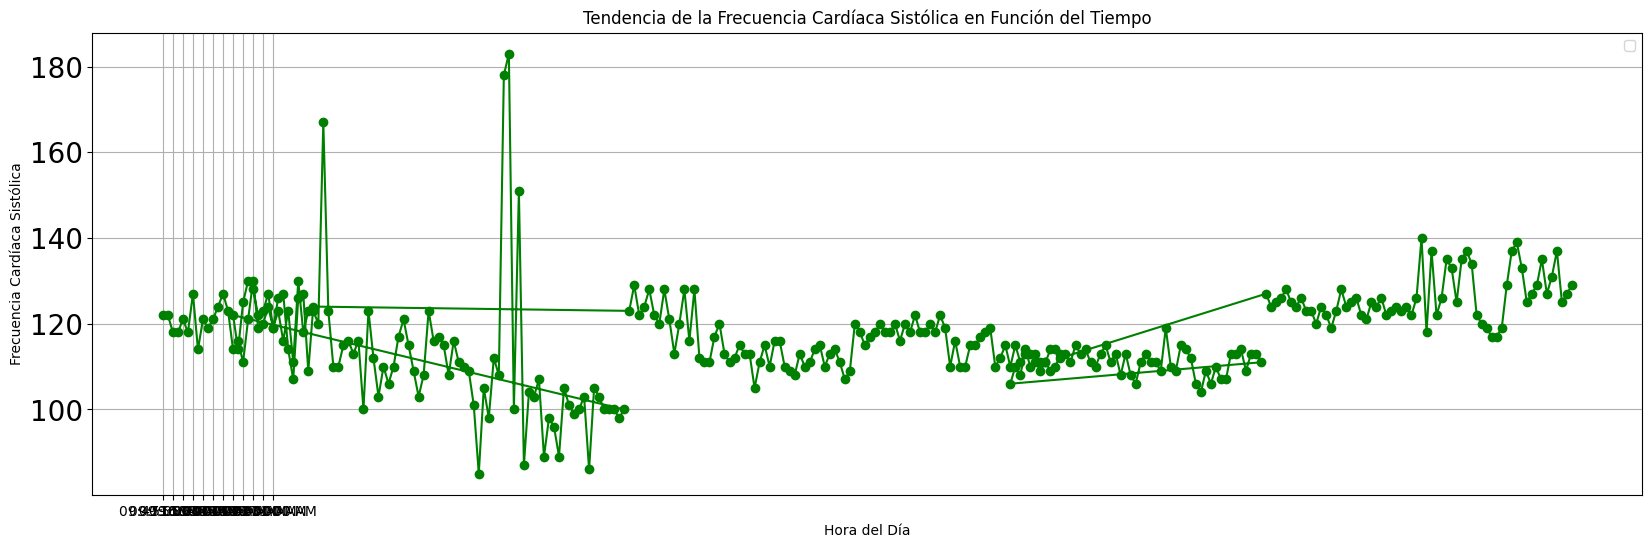

In [99]:
# Crear el gráfico de línea
plt.figure(figsize=(20, 6))
plt.plot(data['Hora'], data['FC SISTOLE'], marker='o', linestyle='-', color='green')
plt.title('Tendencia de la Frecuencia Cardíaca Sistólica en Función del Tiempo')
plt.xlabel('Hora del Día')
plt.ylabel('Frecuencia Cardíaca Sistólica')
plt.grid(True)
plt.xticks(range(0, 24, 2))  # Establecer marcas en el eje x cada 2 horas
plt.yticks(fontsize=20)
plt.legend()  # Mostrar leyenda
plt.show()

## Conversión de Datos

Esta sección muestra cómo se convierten los datos categóricos a binarios y los campos de fecha a formato `datetime`, para asegurar que los datos sean procesables.

In [ ]:
#Como se pudo evidenciar en el paso anterior, hay datos categoricos la cual se deben convertir a dato numerico:
#  Codificacion de columnas categóricas: Genero y Clima
data = {
    'Género': ['Masculino', 'Femenino', ],
    'Clima': ['Despejado', 'Nublado']
}
df = pd.DataFrame(data)

print("DataFrame original:")
print(df)

DataFrame original:
      Género      Clima
0  Masculino  Despejado
1   Femenino    Nublado


In [ ]:
# Leer el archivo CSV en un DataFrame
codificacion = "latin-1"
df = pd.read_csv(ruta, encoding=codificacion)

# Verificar las primeras filas del DataFrame para asegurarse de que se cargó correctamente
print(df.head())

# Lista de nombres de columnas a codificar
columnas_codificar = [ 'Género', 'Clima',  ]

# Inicializar el LabelEncoder
encoder = LabelEncoder()
# Iterar sobre cada columna y aplicar LabelEncoder
for columna in columnas_codificar:
    if columna in df.columns:  # Verificar si la columna está presente en el DataFrame
        df[columna + '_encoded'] = encoder.fit_transform(df[columna])
    else:
        print(f"La columna '{columna}' no está presente en el DataFrame.")

   Participante                  Nombre  Edad       Fecha         Hora  \
0             1  Michael Arley Chaparro    27  01/12/2024  09:47:00 AM   
1             1  Michael Arley Chaparro    27  01/12/2024  09:49:00 AM   
2             1  Michael Arley Chaparro    27  01/12/2024  09:51:00 AM   
3             1  Michael Arley Chaparro    27  01/12/2024  09:53:00 AM   
4             1  Michael Arley Chaparro    27  01/12/2024  09:55:00 AM   

      Género Anteojos Barba Bigote Jornada      Clima  Luminosidad  LUX  \
0  Masculino       NO    SI     NO  MAÑANA  DESPEJADO               942   
1  Masculino       NO    SI     NO  MAÑANA  DESPEJADO               429   
2  Masculino       NO    SI     NO  MAÑANA  DESPEJADO               439   
3  Masculino       NO    SI     NO  MAÑANA  DESPEJADO               740   
4  Masculino       NO    SI     NO  MAÑANA  DESPEJADO               990   

   ID-Video  FC SISTOLE  FC DIASTOLE  
0         1         122           78  
1         1         122   

In [ ]:
  # Convertir la columna 'Hora' a tipo datetime
  df['Hora'] = pd.to_datetime(df['Hora'])

  # Extraer componentes de tiempo como características numéricas
  df['Hora_del_dia'] = df['Hora'].dt.hour  # Extraer la hora del día (0-23)
  df['Minutos'] = df['Hora'].dt.minute  # Extraer los minutos (0-59)
  df['Segundos'] = df['Hora'].dt.second  # Extraer los segundos (0-59)

  # Eliminar la columna original 'Hora' si ya no es necesaria
  df.drop('Hora', axis=1, inplace=True)

  # Mostrar el DataFrame resultante
  print(df)

     Participante                        Nombre  Edad       Fecha     Género  \
0               1        Michael Arley Chaparro    27  01/12/2024  Masculino   
1               1        Michael Arley Chaparro    27  01/12/2024  Masculino   
2               1        Michael Arley Chaparro    27  01/12/2024  Masculino   
3               1        Michael Arley Chaparro    27  01/12/2024  Masculino   
4               1        Michael Arley Chaparro    27  01/12/2024  Masculino   
..            ...                           ...   ...         ...        ...   
305            10  Diana Carolina Fajardo Pérez    37  01/31/2024   Femenino   
306            10  Diana Carolina Fajardo Pérez    37  01/31/2024   Femenino   
307            10  Diana Carolina Fajardo Pérez    37  01/31/2024   Femenino   
308            10  Diana Carolina Fajardo Pérez    37  01/31/2024   Femenino   
309            10  Diana Carolina Fajardo Pérez    37  01/31/2024   Femenino   

    Anteojos Barba Bigote Jornada      

<ipython-input-8-abd9360d1f44>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hora'] = pd.to_datetime(df['Hora'])


In [ ]:
print(df.dtypes)

Participante         int64
Nombre              object
Edad                 int64
Fecha               object
Género              object
Anteojos            object
Barba               object
Bigote              object
Jornada             object
Clima               object
Luminosidad  LUX     int64
ID-Video             int64
FC SISTOLE           int64
FC DIASTOLE          int64
Género_encoded       int64
Clima_encoded        int64
Hora_del_dia         int32
Minutos              int32
Segundos             int32
dtype: object


## Preprocesamiento de Datos

En esta sección, se realiza la limpieza de datos, manejo de valores nulos y otras transformaciones necesarias para preparar los datos para el análisis.

In [ ]:
#Ahora si, se procedera con la limpieza de los datos:
#Limpieza
#1.. Datos faltantes
df.dropna(inplace=True) # Eliminar filas o columnas que contienen valores NaN (valores faltantes) del DataFrame

# Imprimir información sobre el DataFrame después de la limpieza
print("Información del DataFrame después de la limpieza:")
print(df.info())

Información del DataFrame después de la limpieza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Participante      310 non-null    int64 
 1   Nombre            310 non-null    object
 2   Edad              310 non-null    int64 
 3   Fecha             310 non-null    object
 4   Género            310 non-null    object
 5   Anteojos          310 non-null    object
 6   Barba             310 non-null    object
 7   Bigote            310 non-null    object
 8   Jornada           310 non-null    object
 9   Clima             310 non-null    object
 10  Luminosidad  LUX  310 non-null    int64 
 11  ID-Video          310 non-null    int64 
 12  FC SISTOLE        310 non-null    int64 
 13  FC DIASTOLE       310 non-null    int64 
 14  Género_encoded    310 non-null    int64 
 15  Clima_encoded     310 non-null    int64 
 16  Hora_del_dia

In [ ]:
#2.. Columnas irrelevantes
#2.1.. Analisis de las variables categoricas
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = [  'Fecha',  'Género',
       'Anteojos', 'Barba', 'Clima' ]

for col in cols_cat:
   # Calcular el número de niveles únicos en la columna
    num_niveles = df[col].nunique()

   # Imprimir el resultado del análisis para cada columna
    print(f'Columna {col}: {num_niveles} subniveles')

Columna Fecha: 8 subniveles
Columna Género: 3 subniveles
Columna Anteojos: 2 subniveles
Columna Barba: 3 subniveles
Columna Clima: 2 subniveles


In [ ]:
#Columnas irrevelantes
 #Se eliminara la columna Bigote, ya que contiene un solo valor y la columna jornada,
 #ya que proporciona informacion rebundante. Asi mismo, la columna 'Nombre' porque existe una columna llamada numero de participante.

# Verificar que 'data' sea un DataFrame
if isinstance(df, pd.DataFrame):
    # Imprimir el tamaño del DataFrame antes de eliminar columnas irrelevantes
    print(f'Tamaño del DataFrame antes de eliminar las columnas irrelevantes: {df.shape}')

    # Eliminar las columnas irrelevantes ('Nombre', 'Bigote', 'Jornada', 'ID-Video', 'Fecha', 'Anteojos', 'Barba', 'Segundos')
    df.drop(columns=['Nombre', 'Bigote', 'Jornada', 'ID-Video', 'Fecha', 'Anteojos', 'Barba', 'Segundos'], inplace=True)

    # Imprimir el tamaño del DataFrame después de eliminar las columnas irrelevantes
    print(f'Tamaño del DataFrame después de eliminar las columnas irrelevantes: {df.shape}')
else:
    print("Error: 'df' no es un DataFrame válido.")

Tamaño del DataFrame antes de eliminar las columnas irrelevantes: (310, 19)
Tamaño del DataFrame después de eliminar las columnas irrelevantes: (310, 11)


In [ ]:
#2.2.. Analisis de las variables numericas
df.describe() #  generar un resumen estadístico de un DataFrame

,Participante,Edad,Luminosidad LUX,FC SISTOLE,FC DIASTOLE,Género_encoded,Clima_encoded,Hora_del_dia,Minutos
count,310.000000,310.000000,310.000000,310.000000,310.00000,310.000000,310.000000,310.000000,310.000000
mean,5.500000,29.800000,443.664516,116.748387,76.16129,1.500000,0.200000,14.858065,29.616129
std,2.876925,6.299843,681.613665,11.018721,7.09846,0.807529,0.400647,3.808420,17.340425
min,1.000000,22.000000,1.000000,85.000000,47.00000,0.000000,0.000000,9.000000,0.000000
25%,3.000000,27.000000,13.000000,110.250000,71.00000,1.000000,0.000000,10.000000,15.000000
50%,5.500000,29.000000,44.500000,116.000000,77.00000,2.000000,0.000000,15.000000,30.000000
75%,8.000000,31.000000,750.750000,123.000000,80.00000,2.000000,0.000000,19.000000,45.000000
max,10.000000,44.000000,3158.000000,183.000000,100.00000,2.000000,1.000000,21.000000,59.000000


In [ ]:
#Filas repetidas
print(f'Tamaño del set antes de eliminar las filas repetidas: {df.shape}')
df.drop_duplicates(inplace=True) # eliminar filas duplicadas de un DataFrame.

print(f'Tamaño del set después de eliminar las filas repetidas: {df.shape}')

Tamaño del set antes de eliminar las filas repetidas: (310, 11)
Tamaño del set después de eliminar las filas repetidas: (310, 11)


In [ ]:
# Renombrar las columnas utilizando el método rename()
nuevos_nombres = {
    'Luminosidad  LUX': 'Luminosidad',
    'FC SISTOLE': 'fc_sistole',
    'FC DIASTOLE': 'fc_diastole'
}

# Aplicar los nuevos nombres utilizando el método rename()
df.rename(columns=nuevos_nombres, inplace=True)

# Verificar los nombres de las columnas actualizados
print(df.columns)

Index(['Participante', 'Edad', 'Género', 'Clima', 'Luminosidad', 'fc_sistole',
       'fc_diastole', 'Género_encoded', 'Clima_encoded', 'Hora_del_dia',
       'Minutos'],
      dtype='object')


In [ ]:
# Imprimir las primeras filas del DataFrame para verificar las columnas
print(df.head())

# Lista de nombres de columnas actuales en el DataFrame
print(df.columns)

   Participante  Edad     Género      Clima  Luminosidad  fc_sistole  \
0             1    27  Masculino  DESPEJADO          942         122   
1             1    27  Masculino  DESPEJADO          429         122   
2             1    27  Masculino  DESPEJADO          439         118   
3             1    27  Masculino  DESPEJADO          740         118   
4             1    27  Masculino  DESPEJADO          990         121   

   fc_diastole  Género_encoded  Clima_encoded  Hora_del_dia  Minutos  
0           78               2              0             9       47  
1           78               2              0             9       49  
2           76               2              0             9       51  
3           76               2              0             9       53  
4           78               2              0             9       55  
Index(['Participante', 'Edad', 'Género', 'Clima', 'Luminosidad', 'fc_sistole',
       'fc_diastole', 'Género_encoded', 'Clima_encoded', 'Hora

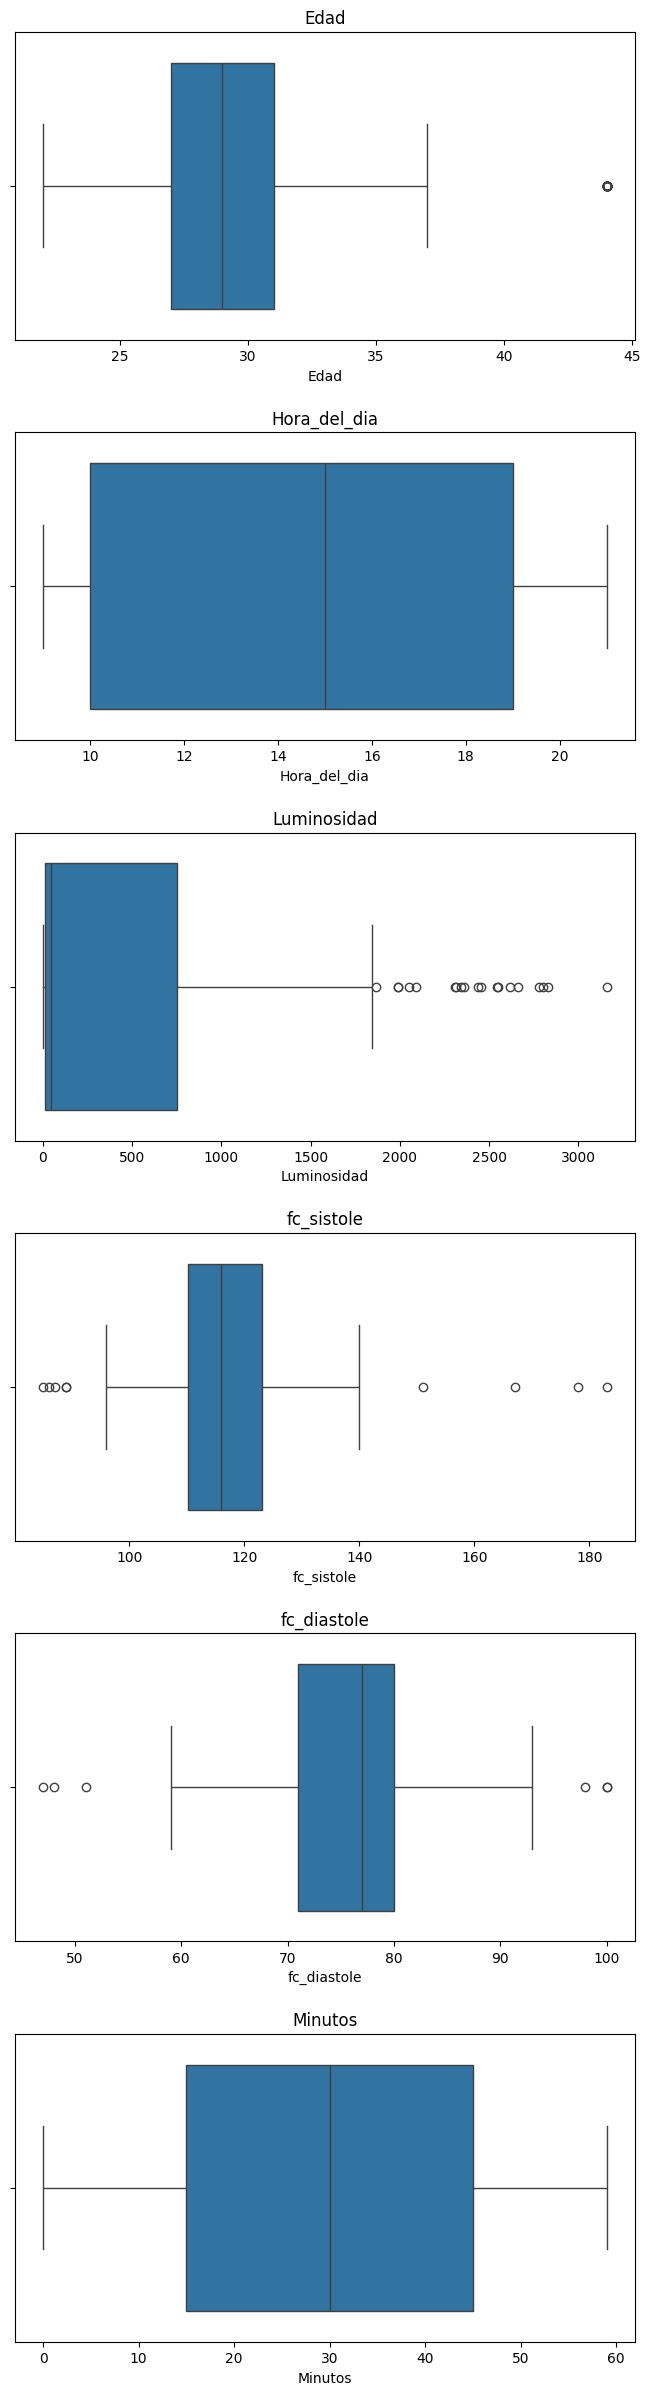

In [ ]:
#Outliers en las variables numéricas

# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
cols_num = [ 'Edad','Hora_del_dia', 'Luminosidad', 'fc_sistole',
            'fc_diastole', 'Minutos']

fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.3)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)

In [ ]:

# Eliminar filas con "Luminosidad">3000
print(f'Tamaño del set antes de eliminar registros de edad: {df.shape}')
df = df[df['Luminosidad']<=3000]
print(f'Tamaño del set después de eliminar registros de edad: {df.shape}')

Tamaño del set antes de eliminar registros de edad: (310, 11)
Tamaño del set después de eliminar registros de edad: (309, 11)


In [ ]:
# Eliminar filas con "fc_sistole">160
print(f'Tamaño del set antes de eliminar registros de edad: {df.shape}')
df = df[df['fc_sistole']<=160]
print(f'Tamaño del set después de eliminar registros de edad: {df.shape}')

Tamaño del set antes de eliminar registros de edad: (309, 11)
Tamaño del set después de eliminar registros de edad: (306, 11)


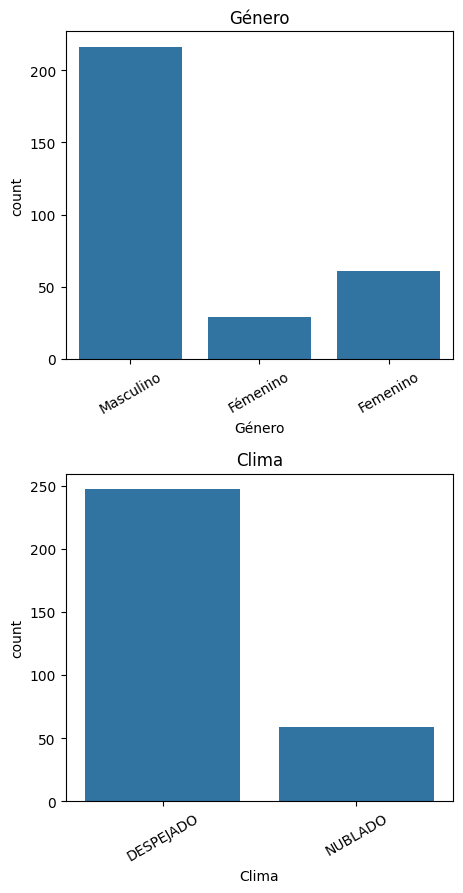

In [ ]:
#Errores tipográficos en variables categóricas
# Graficar los subniveles de cada variable categórica
cols_cat = ['Género', 'Clima']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5,10))
fig.subplots_adjust(hspace=0.35)

for i, col in enumerate(cols_cat):
    sns.countplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)
    ax[i].tick_params(axis='x', labelrotation=30)  # Rotar etiquetas del eje x

plt.show()

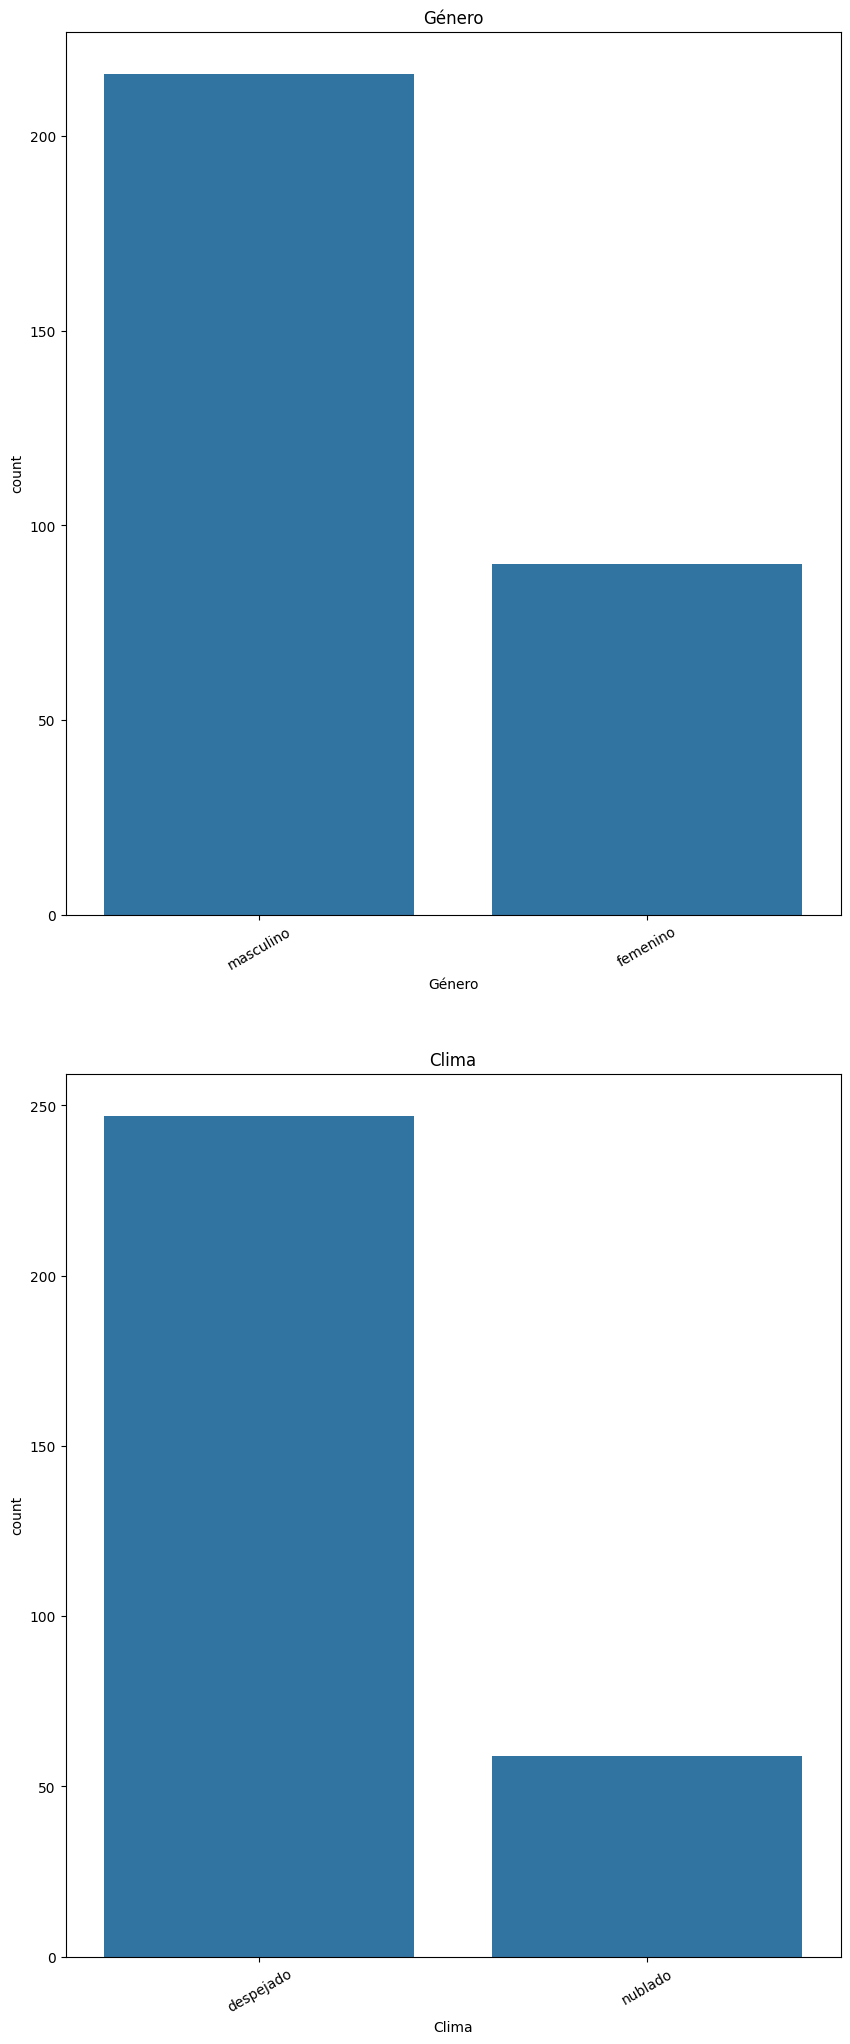

In [ ]:
#Inicialmente se observa que hay sub-niveles con el mismo nombre pero escritos en minúscula, en mayúscula o con la primera letra en mayúscula, incluso unas con til y las otras no.
# La columna 'Genero' tiene datos Masculino, Fémenino y Femenino

# Convertir las entradas de las columnas categóricas a minúsculas
for column in df.columns:
    # Representar en minúsculas sólo si la columna es categórica y unidecode para normalizar tildes
    if column in cols_cat:
        df[column] = df[column].str.lower().apply(unidecode)

# Y generemos las gráficas nuevamente
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,25))
fig.subplots_adjust(hspace=0.18)

for i, col in enumerate(cols_cat):
    sns.countplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)
    ax[i].tick_params(axis='x', labelrotation=30)  # Rotar etiquetas del eje x

plt.show()

In [ ]:
#Como se necesita que el conjunto de datos sea numerico se eliminara las columnas originales de:  'Genero',  'Clima',

print(f'Tamaño del DataFrame antes de eliminar las columnas categoricas: {df.shape}')

df.drop(columns=['Género'], inplace=True)
df.drop(columns=['Clima'], inplace=True)

print(f'Tamaño del DataFrame después de eliminar las columnas categoricas: {df.shape}')

Tamaño del DataFrame antes de eliminar las columnas categoricas: (306, 11)
Tamaño del DataFrame después de eliminar las columnas categoricas: (306, 9)


In [ ]:
#Ahora, se reorganizara el orden de las columnas con el fin de que la variable independiente me quede de utlimas
# 1.Definir el orden deseado de las columnas
column_order = ['Participante', 'Edad', 'Luminosidad', 'Género_encoded', 'Clima_encoded','Hora_del_dia', 'Minutos', 'fc_diastole', 'fc_sistole']  # Aquí 'FC DIASTOLE', 'FC SISTOLE' se mueven al final

# Reorganizar las columnas según el orden deseado
df = df[column_order]

print(df.shape)
df.head()

(306, 9)


,Participante,Edad,Luminosidad,Género_encoded,Clima_encoded,Hora_del_dia,Minutos,fc_diastole,fc_sistole
0,1,27,942,2,0,9,47,78,122
1,1,27,429,2,0,9,49,78,122
2,1,27,439,2,0,9,51,76,118
3,1,27,740,2,0,9,53,76,118
4,1,27,990,2,0,9,55,78,121


In [5]:
#Listo, el dataset esta listo.
from google.colab import drive
drive.mount('/content/drive')

#Ahora se importa el dataset limpio

# 'data' es tu DataFrame modificado y 'ruta' es la ruta de destino en Google Drive
ruta = "/content/drive/MyDrive/dataset_proyecto.csv"  # Ruta donde deseas guardar el archivo CSV en Google Drive

#  Guardar el DataFrame 'df' como un archivo CSV en la ruta especificada
df.to_csv(ruta, index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


NameError: name 'df' is not defined

In [89]:
# Lectura del dataset
drive.mount('/gdrive')
ruta = "/gdrive/MyDrive/dataset_proyecto.csv"
df = pd.read_csv(ruta, encoding='latin-1')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [90]:
print(df.dtypes)

Participante       int64
Edad               int64
Luminosidad        int64
GÃ©nero_encoded    int64
Clima_encoded      int64
Hora_del_dia       int64
Minutos            int64
fc_diastole        int64
fc_sistole         int64
dtype: object


## Análisis exploratorio de datos (EDA)

A continuación, se realizará un análisis de las variables del dataset, incluyendo la matriz de correlación, los gráficos de densidad y los histogramas.

**Análisis de Variables**
1.La matriz de correlación se realiza en el proyecto por varias razones clave, que son fundamentales para el análisis de datos y el desarrollo de modelos de aprendizaje automático. Es util:

*  Identificación de relaciones entre variables: La matriz de correlación permite identificar y cuantificar la relación entre diferentes variables del dataset. Esto es crucial para entender cómo se relacionan las variables independientes entre sí y con la variable dependiente (en este caso, la somnolencia).
*   Comprensión del dataset: Proporciona una visión general rápida y visual de cómo se comportan las variables entre sí. Esto es útil para obtener una comprensión preliminar del dataset y para guiar el análisis y la modelización posterior.



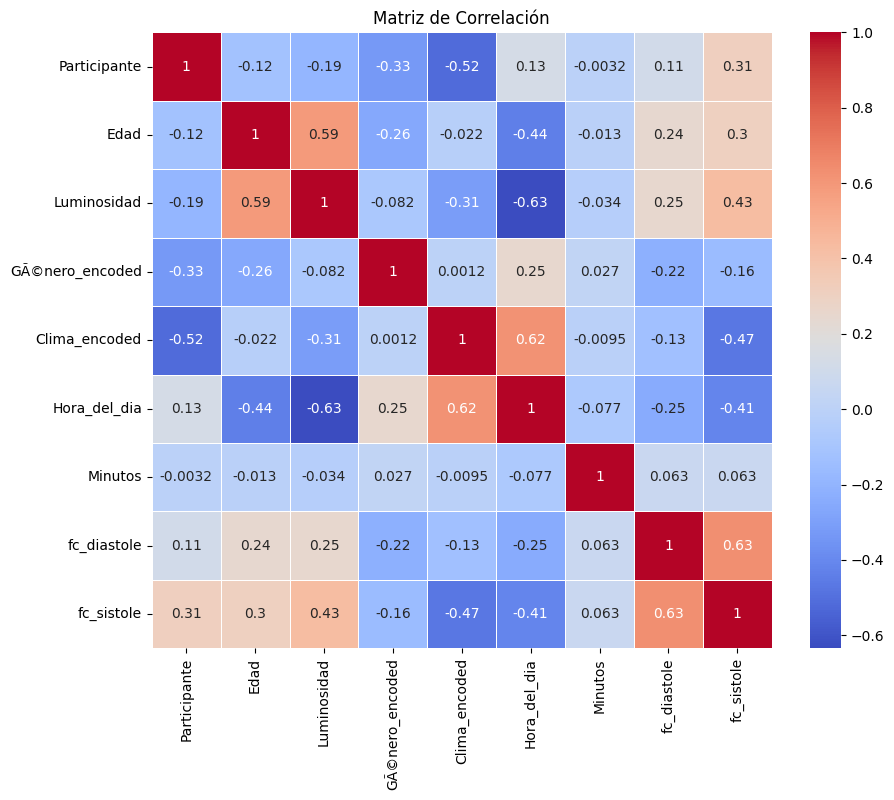

In [10]:
# Matriz de correlación entre variables numéricas
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

##Histogramas
Los histogramas son fundamentales para entender la distribución de las variables numéricas. Permiten visualizar la frecuencia de los valores de una variable y detectar la presencia de sesgos, asimetrías, o la existencia de valores atípicos (outliers).
##Gráficos de Densidad
Los gráficos de densidad son importantes porque permiten visualizar la distribución de una variable numérica de manera continua. Ayudan a identificar patrones, tendencias, y anomalías en los datos que podrían no ser evidentes con otros tipos de gráficos.

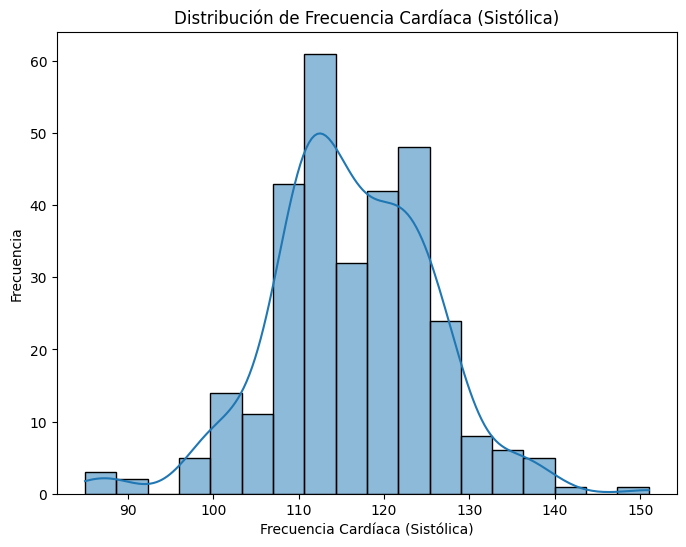

In [11]:
# Histograma de frecuencia cardíaca
plt.figure(figsize=(8, 6))
sns.histplot(df['fc_sistole'], kde=True)
plt.title('Distribución de Frecuencia Cardíaca (Sistólica)')
plt.xlabel('Frecuencia Cardíaca (Sistólica)')
plt.ylabel('Frecuencia')
plt.show()

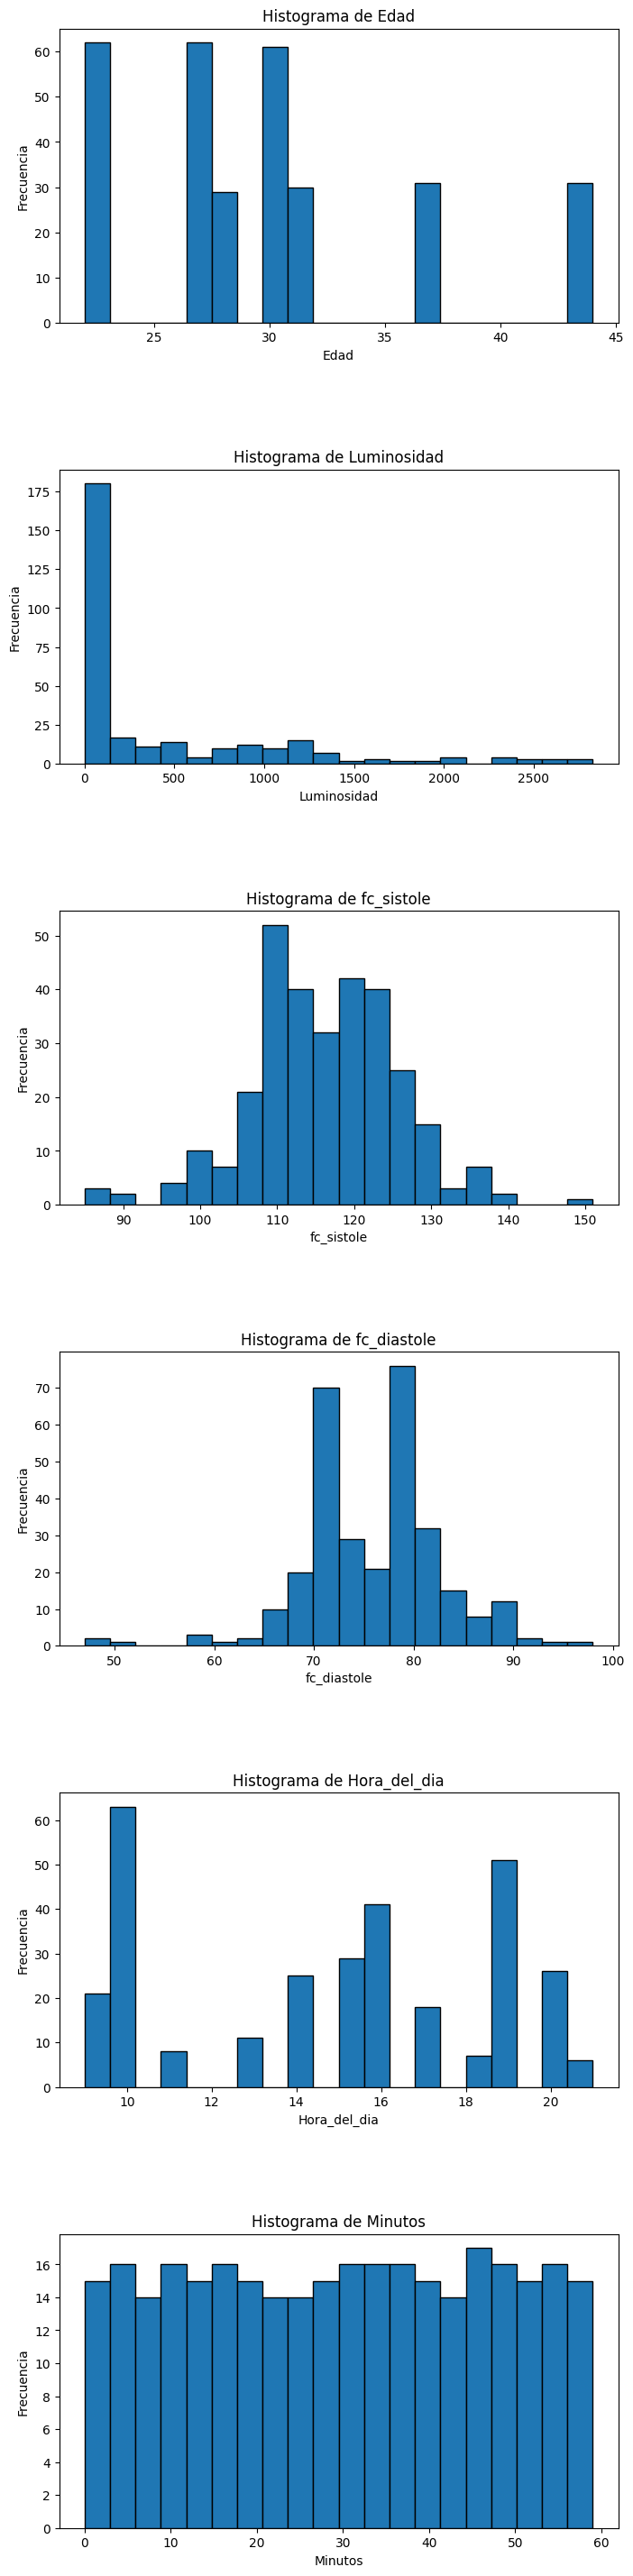

In [12]:
# histogramas para cada variable numérica
num_cols = ['Edad', 'Luminosidad', 'fc_sistole', 'fc_diastole', 'Hora_del_dia', 'Minutos']

fig, ax = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(8, 6*len(num_cols)))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(num_cols):
    ax[i].hist(df[col], bins=20, edgecolor='black')
    ax[i].set_title(f'Histograma de {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frecuencia')

plt.show()

<ipython-input-13-88c4663390a6>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], ax=ax[i], shade=True)
<ipython-input-13-88c4663390a6>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], ax=ax[i], shade=True)
<ipython-input-13-88c4663390a6>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], ax=ax[i], shade=True)
<ipython-input-13-88c4663390a6>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], ax=ax[i], shade=True)
<ipython-input-13-88c4663390a6>:6: FutureWarning: 

`sha

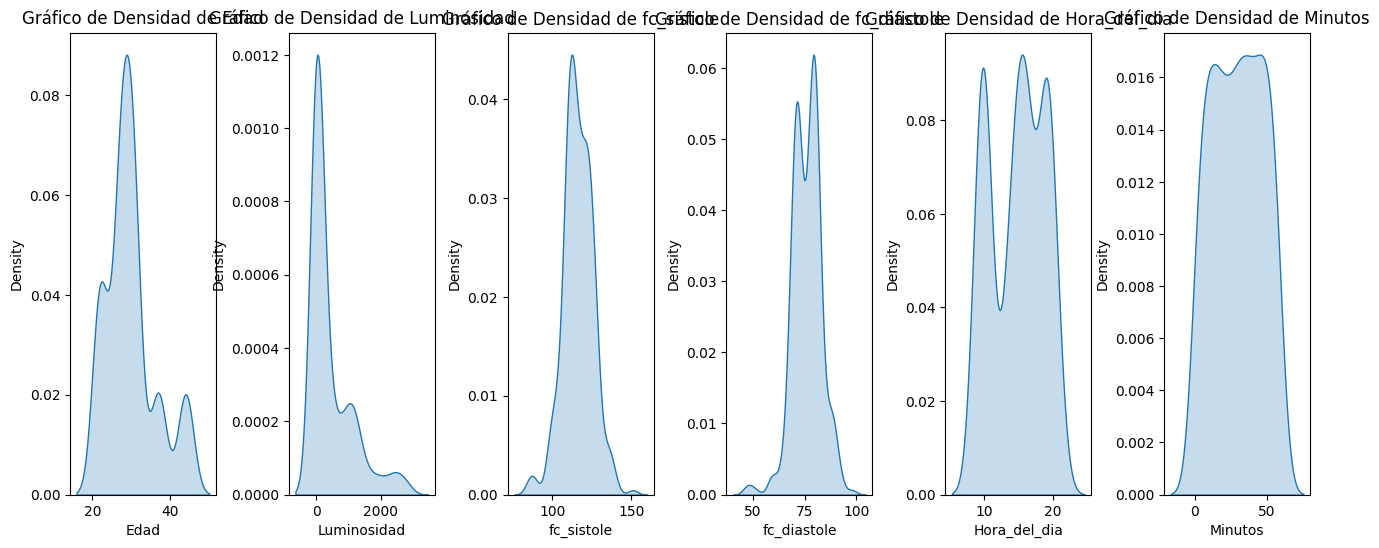

In [13]:
# Gráficos de densidad para cada variable numérica
fig, ax = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(16, 6))
fig.subplots_adjust(wspace=0.5)

for i, col in enumerate(num_cols):
    sns.kdeplot(df[col], ax=ax[i], shade=True)
    ax[i].set_title(f'Gráfico de Densidad de {col}')

plt.show()

##Modelos de Machine Learning
En esta sección, se describen los modelos de machine learning utilizados para la detección de somnolencia.

1. Modelo de Regresión Lineal Múltiple:
Este modelo es fácil de interpretar, ya que permite comprender la relación lineal entre las variables predictoras (características faciales, patrones de comportamiento) y la variable objetivo (estado de somnolencia).
2. Modelo Ridge:
Este modelo penaliza la complejidad del modelo, lo que ayuda a evitar el sobreajuste y mejora la generalización a nuevos datos.
3. Modelo Lasso
Este modelo realiza una selección de variables automática, identificando las características faciales o patrones de comportamiento más relevantes para la predicción del estado de somnolencia.
4. Modelo de Maquina de Soporte Vectorial (SVM)
SVM puede manejar relaciones no lineales entre las variables, lo que es importante para la detección de somnolencia, ya que los patrones faciales y de comportamiento pueden ser complejos y no lineales.
5. Modelo AdaBoost
La capacidad de AdaBoost para mejorar la precisión de modelos débiles es crucial en un contexto donde la detección de somnolencia necesita ser precisa para ser efectiva.
6. Modelo de Árboles de Decisión
Este modelo es fácil de interpretar y puede capturar relaciones no lineales en los datos, lo que lo hace adecuado para la detección de somnolencia.

In [14]:
##1. Modelo de Regresión Lineal Múltiple
# Seleccionar las variables independientes (X) y la variable dependiente (y).
X = df[['Minutos', 'Participante',	'Edad',	'Luminosidad',	'GÃ©nero_encoded',	'Clima_encoded','Hora_del_dia','fc_diastole']]
y = df['fc_sistole' ]
#Dividir el conjunto de datos en el conjunto de entrenamiento y el conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
#Entrenamiento del modelo de regresión lineal múltiple en el conjunto de entrenamiento
from sklearn.linear_model import LinearRegression
lm = regressor = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [16]:
#Predicción de los resultados del conjunto de pruebas
y_pred = lm.predict(X_test)

Text(0, 0.5, 'Frecuencia cardiaca ')

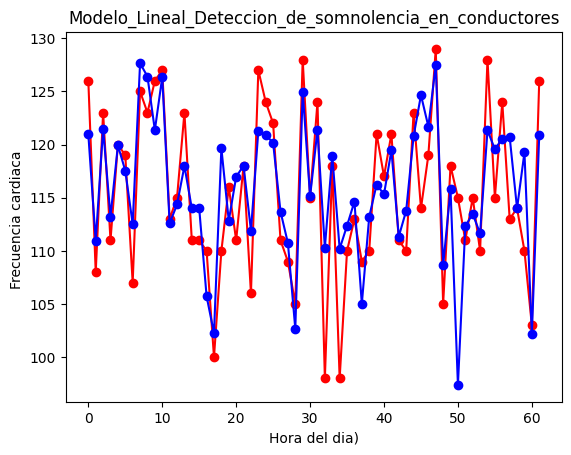

In [17]:
#Crear gráfico de la regresión lineal múltiple con Python matplotlib
z = np.arange(len(y_pred))
plt.plot( z, y_test, color = "red", marker = "o", label = "Valor real")
plt.plot( z, y_pred, color = "blue", marker = "o", label = "Valor previsto")
plt.title("Modelo_Lineal_Deteccion_de_somnolencia_en_conductores")
plt.xlabel("Hora del dia)")
plt.ylabel("Frecuencia cardiaca ")

In [18]:
# Evaluacion del modelo de regresion lineal multiple
from sklearn.metrics import mean_squared_error, r2_score
lm.score(X_test, y_test)
r2_lm = r2_score(y_test, y_pred)
print("R^2 test lm: %.4f " %r2_lm )
mse_lm = mean_squared_error(y_test,y_pred)
print("MSE lm: %.4f" % mse_lm)
rmse_lm = np.sqrt(mse_lm)
print("RMSE lm: %.4f" % rmse_lm)

R^2 test lm: 0.5883 
MSE lm: 24.5692
RMSE lm: 4.9567


In [78]:
#2. Modelo Ridge
# Lectura del dataset
drive.mount('/gdrive')
ruta = "/gdrive/MyDrive/dataset_proyecto.csv"
df = pd.read_csv(ruta, encoding='latin-1')


X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [79]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# Escalar las características para el modelo Ridge
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:

# Inicializar el modelo de regresión Ridge
ridge_model = Ridge()

In [82]:
# Entrenar el modelo con los datos de entrenamiento
ridge_model.fit(X_train_scaled, y_train)

Ridge()

In [83]:
# Ahora hacer predicciones con los datos de prueba
y_pred = ridge_model.predict(X_test_scaled)

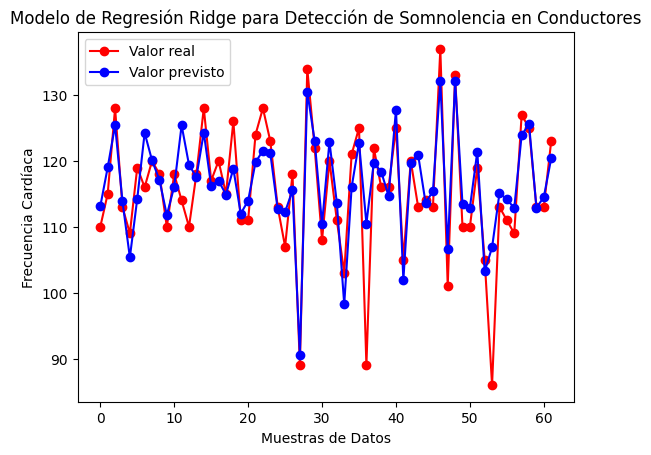

In [84]:
# Graficar los resultados
z = np.arange(len(y_pred))
plt.plot(z, y_test, color="red", marker="o", label="Valor real")
plt.plot(z, y_pred, color="blue", marker="o", label="Valor previsto")
plt.title("Modelo de Regresión Ridge para Detección de Somnolencia en Conductores")
plt.xlabel("Muestras de Datos")
plt.ylabel("Frecuencia Cardíaca")
plt.legend(loc="upper left")
plt.show()

In [85]:
# Evaluar el modelo Ridge
r2_ridge = r2_score(y_test, y_pred)
print("R^2 del modelo Ridge: %.4f" % r2_ridge)
mse_ridge = mean_squared_error(y_test, y_pred)
print("MSE del modelo Ridge: %.4f" % mse_ridge)
rmse_ridge = np.sqrt(mse_ridge)
print("RMSE del modelo Ridge: %.4f" % rmse_ridge)

R^2 del modelo Ridge: 0.7002
MSE del modelo Ridge: 28.4418
RMSE del modelo Ridge: 5.3331


In [27]:
#3. Modelo Lineal Lasso
# Lectura del dataset
drive.mount('/gdrive')
ruta = "/gdrive/MyDrive/dataset_proyecto.csv"
df = pd.read_csv(ruta, encoding='latin-1')

# Seleccionar las variables independientes (X) y la variable dependiente (y).
X = df[['Minutos', 'Participante',	'Edad',	'Luminosidad',	'GÃ©nero_encoded',	'Clima_encoded','Hora_del_dia','fc_diastole']]
y = df['fc_sistole' ]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [28]:
# Escalar las características para el modelo Lasso
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# Crear una instancia del modelo Lasso
alpha = 0.1  # Parámetro de regularización (puedes ajustar esto según sea necesario)
lasso_model = Lasso(alpha=alpha)

In [30]:
# Entrenar el modelo Lasso
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [31]:
# Hacer predicciones sobre los datos de prueba
y_pred = lasso_model.predict(X_test_scaled)

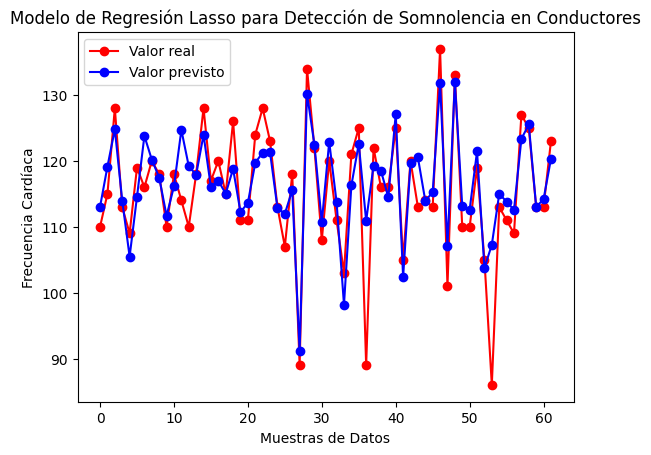

In [32]:
# Graficar los resultados
z = np.arange(len(y_pred))
plt.plot(z, y_test, color="red", marker="o", label="Valor real")
plt.plot(z, y_pred, color="blue", marker="o", label="Valor previsto")
plt.title("Modelo de Regresión Lasso para Detección de Somnolencia en Conductores")
plt.xlabel("Muestras de Datos")
plt.ylabel("Frecuencia Cardíaca")
plt.legend(loc="upper left")
plt.show()

In [33]:
# Evaluar el modelo Lasso
r2_lasso = r2_score(y_test, y_pred)
print("R^2 del modelo Lasso: %.4f" % r2_lasso)
mse_lasso = mean_squared_error(y_test, y_pred)
print("MSE del modelo Lasso: %.4f" % mse_lasso)
rmse_lasso = np.sqrt(mse_lasso)
print("RMSE del modelo Lasso: %.4f" % rmse_lasso)

R^2 del modelo Lasso: 0.6988
MSE del modelo Lasso: 28.5697
RMSE del modelo Lasso: 5.3451


In [35]:
#4. Modelo Maquina de soporte vectorial
from sklearn.datasets import fetch_california_housing
#Importación del conjunto de datos
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

drive.mount('/gdrive')
ruta ="/gdrive/MyDrive/dataset_proyecto.csv"
dataset= pd.read_csv(ruta, encoding='latin-1')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [36]:
# Obtener los datos y las etiquetas (target)
X = dataset.iloc[:, 1:-1].values  # Características
y = dataset.iloc[:, -1].values     # Variable objetivo

In [37]:
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

In [39]:
# Crear el modelo SVR con kernel lineal y parámetro de regularización C
regressor = SVR(kernel="linear", C=100, gamma="auto")

In [40]:
# Entrenar el modelo utilizando los conjuntos de entrenamiento
regressor.fit(X_train, y_train)

SVR(C=100, gamma='auto', kernel='linear')

In [41]:
# Predecir los resultados utilizando el conjunto de prueba
y_pred_regressor = regressor.predict(X_test)

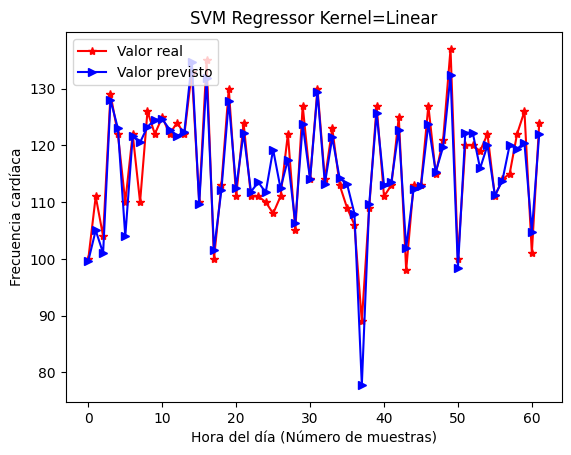

In [42]:
# Graficar los valores reales vs. los valores predichos
z = np.arange(len(y_pred_regressor))
plt.plot(z, y_test, color="red", marker="*", label="Valor real")
plt.plot(z, y_pred_regressor, color="blue", marker=">", label="Valor previsto")
plt.title("SVM Regressor Kernel=Linear")
plt.xlabel("Hora del día (Número de muestras)")
plt.ylabel("Frecuencia cardíaca")
plt.legend(loc="upper left")
plt.show()

In [43]:
# Evaluar el modelo utilizando R^2, MSE y RMSE
r2_svm_linear = regressor.score(X_test, y_test)
print("R^2 test svm_linear: %.4f" % r2_svm_linear)
mse_svm_linear = mean_squared_error(y_test, y_pred_regressor)
print("MSE svm_linear: %.4f" % mse_svm_linear)
rmse_svm_linear = np.sqrt(mse_svm_linear)
print("RMSE svm_linear: %.4f" % rmse_svm_linear)

R^2 test svm_linear: 0.8759
MSE svm_linear: 11.8422
RMSE svm_linear: 3.4412


In [45]:
#5. Modelo AdaBoost
drive.mount('/gdrive')
ruta ="/gdrive/MyDrive/dataset_proyecto.csv"
dataset= pd.read_csv(ruta, encoding='latin-1')

# Seleccionar las variables independientes (X) y la variable dependiente (y).
X = df[['Minutos', 'Participante',	'Edad',	'Luminosidad',	'GÃ©nero_encoded',	'Clima_encoded','Hora_del_dia','fc_diastole']]
y = df['fc_sistole' ]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [46]:
# Crear una instancia del modelo AdaBoostRegressor
adaboost_model = AdaBoostRegressor(n_estimators=50, random_state=42)

In [47]:
# Entrenar el modelo AdaBoost
adaboost_model.fit(X_train, y_train)

AdaBoostRegressor(random_state=42)

In [48]:
# Hacer predicciones sobre los datos de prueba
y_pred = adaboost_model.predict(X_test)

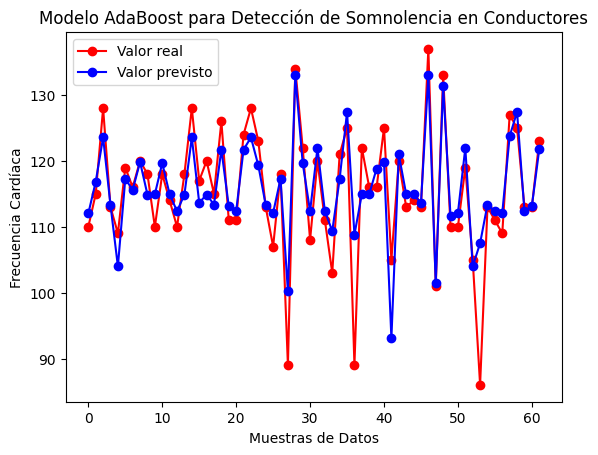

In [49]:
# Graficar los resultados
z = np.arange(len(y_pred))
plt.plot(z, y_test, color="red", marker="o", label="Valor real")
plt.plot(z, y_pred, color="blue", marker="o", label="Valor previsto")
plt.title("Modelo AdaBoost para Detección de Somnolencia en Conductores")
plt.xlabel("Muestras de Datos")
plt.ylabel("Frecuencia Cardíaca")
plt.legend(loc="upper left")
plt.show()

In [50]:
# Evaluar el modelo
r2_adaboost = r2_score(y_test, y_pred)
print("R^2 del modelo AdaBoost: %.4f" % r2_adaboost)

mse_adaboost = mean_squared_error(y_test, y_pred)
print("MSE del modelo AdaBoost: %.4f" % mse_adaboost)

rmse_adaboost = np.sqrt(mse_adaboost)
print("RMSE del modelo AdaBoost: %.4f" % rmse_adaboost)

R^2 del modelo AdaBoost: 0.7229
MSE del modelo AdaBoost: 26.2860
RMSE del modelo AdaBoost: 5.1270


In [52]:
#6. Modelo Regresión del árbol de decisión
drive.mount('/gdrive')
ruta ="/gdrive/MyDrive/dataset_proyecto.csv"
df= pd.read_csv(ruta, encoding='latin-1')

# Seleccionar las variables independientes (X) y la variable dependiente (y).
X = df[['Minutos', 'Participante',	'Edad',	'Luminosidad',	'GÃ©nero_encoded',	'Clima_encoded','Hora_del_dia','fc_diastole']]
y = df['fc_sistole' ]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [53]:
# Crear una instancia del modelo de regresión de árbol de decisión
tree_model = DecisionTreeRegressor(random_state=42)

In [54]:
# Entrenar el modelo de árbol de decisión
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [55]:
# Hacer predicciones sobre los datos de prueba
y_pred = tree_model.predict(X_test)

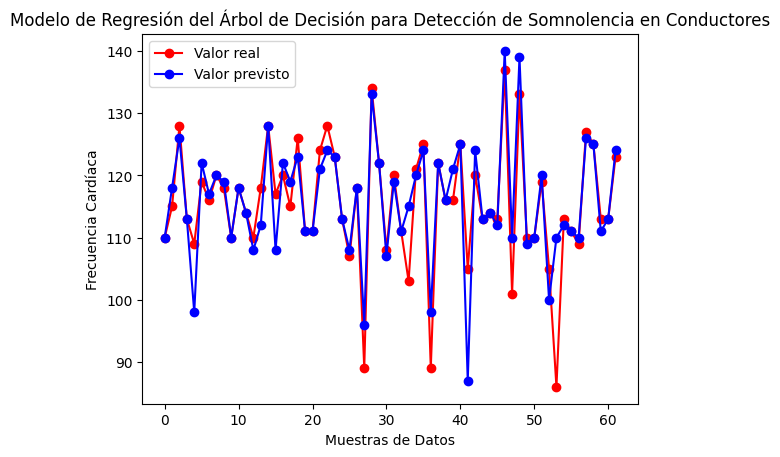

In [56]:
# Graficar los resultados
z = np.arange(len(y_pred))
plt.plot(z, y_test, color="red", marker="o", label="Valor real")
plt.plot(z, y_pred, color="blue", marker="o", label="Valor previsto")
plt.title("Modelo de Regresión del Árbol de Decisión para Detección de Somnolencia en Conductores")
plt.xlabel("Muestras de Datos")
plt.ylabel("Frecuencia Cardíaca")
plt.legend(loc="upper left")
plt.show()

In [57]:
# Evaluar el modelo de Arbol de desicion
r2_tree = r2_score(y_test, y_pred)
print("R^2 del modelo de Árbol de Decisión: %.4f" % r2_tree)
mse_tree = mean_squared_error(y_test, y_pred)
print("MSE del modelo de Árbol de Decisión: %.4f" % mse_tree)
rmse_tree = np.sqrt(mse_tree)
print("RMSE del modelo de Árbol de Decisión: %.4f" % rmse_tree)

R^2 del modelo de Árbol de Decisión: 0.7104
MSE del modelo de Árbol de Decisión: 27.4677
RMSE del modelo de Árbol de Decisión: 5.2410


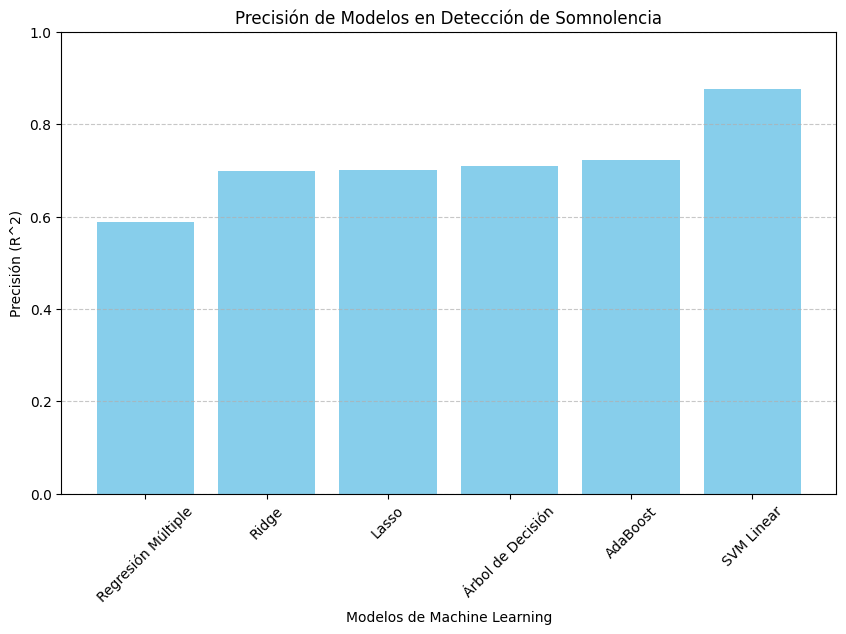

In [100]:
# Modelos evaluados y sus métricas
modelos = ['Regresión Múltiple', 'Ridge', 'Lasso', 'Árbol de Decisión', 'AdaBoost', 'SVM Linear']
precisiones = [0.5883, 0.6988, 0.7002, 0.7104, 0.7229, 0.8759]

# Graficar la precisión de cada modelo
plt.figure(figsize=(10, 6))
plt.bar(modelos, precisiones, color='skyblue')
plt.xlabel('Modelos de Machine Learning')
plt.ylabel('Precisión (R^2)')
plt.title('Precisión de Modelos en Detección de Somnolencia')
plt.ylim(0, 1)  # Establecer límites en el eje y
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()